# CAPM - Capital Asset Pricing Model

__The capital asset pricing model is an equilibrium model that can be used to determine what returns an investor needs to realize in order to balance out a particular degree of risk. It takes into account both the alpha and the β measurements.__

After solving for alpha, you can then determine how much an investment outperformed(positive alpha) or underperformed(negative alpha) the selected market or benchmark.

__Portfolio Returns:__<br> $r_p(t) = \sum\limits_{i}^{n}w_i r_i(t)$<br><br> __Market Weights $(~w_i)~$:$\frac{ (the~market ~cap ~of  ~company ~i)} {(market ~cap ~of ~all ~companies ~from ~i ~to ~j)}$__<br><br>$w_i=\frac{MarketCap_i}{\sum\limits_{j}^{n} MarketCap_j}$

__CAPM of a portfolio__<br><br> $ r_p(t) = \beta_pr_m(t) + \sum\limits_{i}^{n}w_i \alpha_i(t)$

# __Model CAPM as a simple linear regression.__

In [1]:
from scipy import stats

In [2]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [3]:
import pandas as pd

In [4]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [5]:
import yfinance as yf
import datetime

In [6]:
start = datetime.datetime(2007, 9, 3)
end = datetime.datetime(2021, 3, 4)
nif=yf.download("^NSEI", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [7]:
nif.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3289 entries, 2007-09-17 to 2021-03-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3289 non-null   float64
 1   High       3289 non-null   float64
 2   Low        3289 non-null   float64
 3   Close      3289 non-null   float64
 4   Adj Close  3289 non-null   float64
 5   Volume     3289 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 179.9 KB


In [8]:
nif.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-02-13,4836.549805,4986.549805,4836.549805,4929.450195,4929.450195,0
2015-10-08,8196.750000,8196.750000,8105.850098,8129.350098,8129.350098,171700
2011-06-14,5485.600098,5520.149902,5484.200195,5500.500000,5500.500000,0
2017-09-07,9945.849609,9964.849609,9917.200195,9929.900391,9929.900391,188800
2013-04-04,5640.649902,5644.450195,5565.649902,5574.750000,5574.750000,134600


In [9]:
start = datetime.datetime(2007, 10, 17)
end = datetime.datetime(2021, 3, 3)
srt = yf.download("SRTRANSFIN.NS", start, end, group_by='ticker')

[*********************100%***********************]  1 of 1 completed


In [10]:
srt.sample(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-05-17,1447.949951,1468.500000,1438.050049,1449.250000,1404.611206,941803.0
2010-01-27,495.600006,504.000000,481.000000,489.250000,437.261078,369919.0
2009-06-29,299.899994,305.000000,292.049988,293.850006,257.967621,20789.0
2010-06-11,556.650024,592.000000,556.650024,589.250000,530.174927,201944.0
2016-05-20,1114.949951,1121.400024,1067.449951,1072.599976,1020.963928,583788.0


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

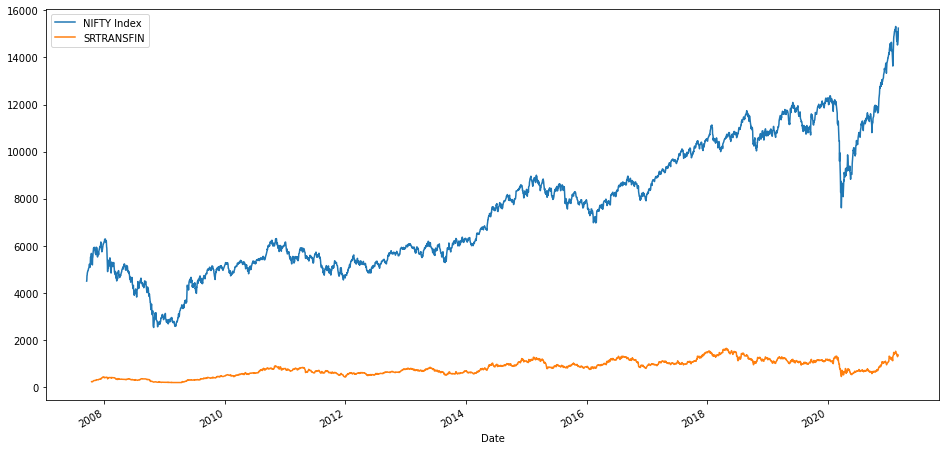

In [12]:
figsize=(16,8)
nif['Close'].plot(label='NIFTY Index', figsize=(16,8))
srt['Close'].plot(label='SRTRANSFIN')
plt.legend();


# Compare Cumulative Return

In [13]:
srt['Cumulative'] = srt['Close']/srt['Close'].iloc[0]

nif['Cumulative']=nif['Close']/nif['Close'].iloc[0]

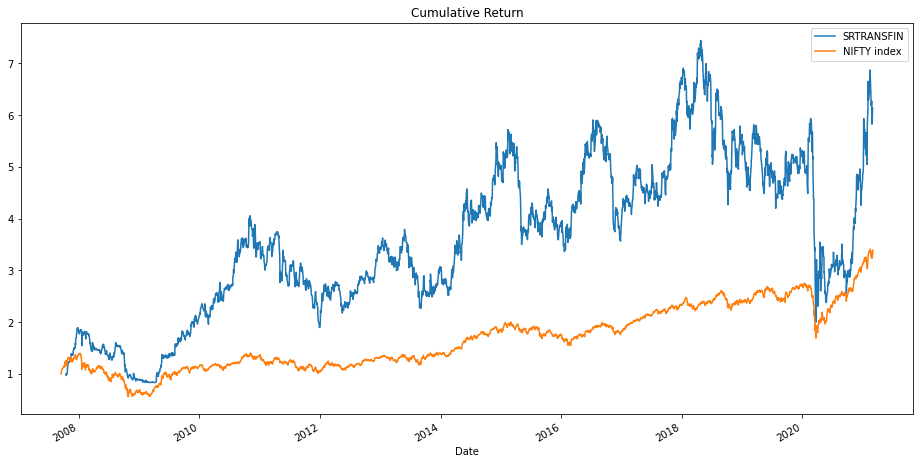

In [14]:
srt['Cumulative'].plot(label='SRTRANSFIN',figsize=(16,8))

nif['Cumulative'].plot(label='NIFTY index')
plt.legend()
plt.title('Cumulative Return');

# Get Daily Return

In [15]:
srt['Daily Return'] = srt['Close'].pct_change(1)

nif['Daily Return'] = nif['Close'].pct_change(1)

In [16]:
nif

,Open,High,Low,Close,Adj Close,Volume,Cumulative,Daily Return
Date,,,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0,1.000000,NaN
2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0,1.011469,0.011469
2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0,1.052885,0.040946
2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0,1.056267,0.003212
2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0,1.076291,0.018957
...,...,...,...,...,...,...,...,...
2021-02-25,15079.849609,15176.500000,15065.349609,15097.349609,15097.349609,803900,3.358960,0.007699
2021-02-26,14888.599609,14919.450195,14467.750000,14529.150391,14529.150391,1103600,3.232543,-0.037636
2021-03-01,14702.500000,14806.799805,14638.549805,14761.549805,14761.549805,507300,3.284249,0.015995


In [17]:
srt

,Open,High,Low,Close,Adj Close,Volume,Cumulative,Daily Return
Date,,,,,,,,
2007-10-17,186.649994,222.399994,186.649994,220.199997,189.270523,24325.0,1.000000,NaN
2007-10-18,218.250000,223.000000,212.000000,213.050003,183.124786,37142.0,0.967530,-0.032470
2007-10-19,210.100006,222.949997,209.949997,219.149994,188.367981,34139.0,0.995232,0.028632
2007-10-22,210.000000,220.500000,210.000000,219.800003,188.926727,170440.0,0.998183,0.002966
2007-10-23,222.000000,222.000000,217.000000,219.800003,188.926727,74532.0,0.998183,0.000000
...,...,...,...,...,...,...,...,...
2021-02-24,1378.000000,1406.000000,1370.050049,1377.949951,1377.949951,1066375.0,6.257720,0.000363
2021-02-25,1392.000000,1404.750000,1371.550049,1380.300049,1380.300049,2106496.0,6.268393,0.001706
2021-02-26,1349.000000,1349.000000,1270.000000,1282.949951,1282.949951,4368614.0,5.826294,-0.070528


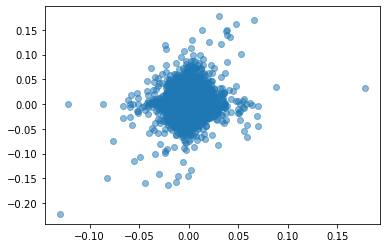

In [18]:
plt.scatter(nif['Daily Return'],srt['Daily Return'],alpha=0.5);

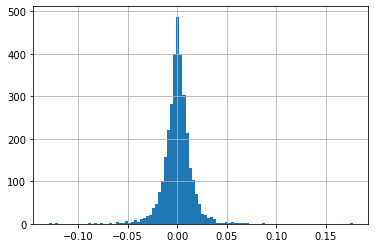

In [24]:
nif['Daily Return'].hist(bins=100);

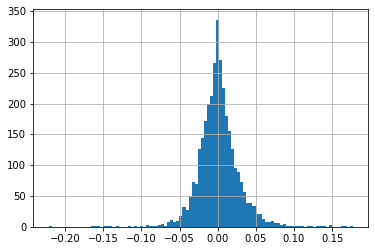

In [20]:
srt['Daily Return'].hist(bins=100);

In [25]:
#why saying srt['Daily Return'].iloc[1:] is that the first line is Na
beta,alpha,r_value,p_value,std_err = stats.linregress(srt['Daily Return'].iloc[1:],nif['Daily Return'].iloc[1:])

__Beta ($~\beta~$) is the portfolio’s systemic risk.__

In [47]:
print("The given portfolio's systematic risk is", beta.round(5)*100, "%")

The given portfolio's systematic risk is 7.829999999999999 %


__The meaning of alpha ($~\alpha~$) in terms of finance is the abnormal rate of return that your portfolio earns as compared to a relevant benchmark or market index.__

In [46]:
print("The given portfolio earns an abnormal rate of return of " ,alpha.round(5)*100, "%")

The given portfolio earns an abnormal rate of return of  0.04 %


# What if our stock was completely related to NIFTY50 ?

In [48]:
nif['Daily Return'].head()

Date
2007-09-17         NaN
2007-09-18    0.011469
2007-09-19    0.040946
2007-09-20    0.003212
2007-09-21    0.018957
Name: Daily Return, dtype: float64

In [49]:
import numpy as np

__In the financial markets, noise can include small price corrections in the market as well as price fluctuations–called volatility –that distorts the overall trend.__

We will create a random normal sample in correspondence to NIFTY50's daily returns.

In [50]:
noise = np.random.normal(0,0.001,len(nif['Daily Return'].iloc[1:]))

In [51]:
noise

array([ 0.00018345, -0.00044614,  0.00065206, ...,  0.00110989,
       -0.00096586,  0.00019974])

In [52]:
nif['Daily Return'].iloc[1:] + noise

Date
2007-09-18    0.011653
2007-09-19    0.040500
2007-09-20    0.003864
2007-09-21    0.019576
2007-09-24    0.019720
                ...   
2021-02-25    0.008418
2021-02-26   -0.037885
2021-03-01    0.017105
2021-03-02    0.009707
2021-03-03    0.022084
Name: Daily Return, Length: 3288, dtype: float64

In [53]:
beta,alpha,r_value,p_value,std_err = stats.linregress(nif['Daily Return'].iloc[1:]+noise,nif['Daily Return'].iloc[1:])

In [56]:
beta #this is just to show that beta is the sensitivity of stock A according the flucuation of stock B

0.9980157605256246

In [55]:
alpha

1.669331982079547e-05